# MAT 381E Homework 2

## Question 1

For this question we are going to use [an NBA dataset](https://sports-statistics.com/sports-data/nba-basketball-datasets-csv-files/). 

1. Get the data from the season 2018-2019 as a pandas dataframe. Explain each column in the dataset.
2. Write a function that takes the `GAME_ID` as the parameter and returns the full dataset for a given match. Test your function on 5 random matches.
3. Write a function that takes the `GAME_ID` as the parameter and returns a dictionary of (key,value) pairs where key is a player name and value is how many times that specific player appears in `PLAYER1_NAME`,`PLAYER2_NAME`, or `PLAYER3_NAME` columns.
4. Plot the results of Step 3 as a bar chart sorted from the most active player to the least active player for 5 random games.
3. Write a function that takes the `GAME_ID` as the parameter and returns a list of pairs of player names where the pair interacted during the game more than once. Test your function on 5 random matches.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import networkx as nx
import seaborn as sns

from urllib.request import Request, urlopen
from urllib.parse import urlencode
from collections import Counter
from zipfile import ZipFile
from io import BytesIO
from xmltodict import parse

c:\Users\ozden\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
with urlopen('https://sports-statistics.com/database/basketball-data/nba/2018-19_pbp.csv') as url:
    nba_18 = pd.read_csv(url)
pd.set_option('display.max_rows', 25)    
nba_18.head(100)

,Unnamed: 0,EVENTMSGACTIONTYPE,EVENTMSGTYPE,EVENTNUM,GAME_ID,HOMEDESCRIPTION,NEUTRALDESCRIPTION,PCTIMESTRING,PERIOD,PERSON1TYPE,...,PLAYER3_ID,PLAYER3_NAME,PLAYER3_TEAM_ABBREVIATION,PLAYER3_TEAM_CITY,PLAYER3_TEAM_ID,PLAYER3_TEAM_NICKNAME,SCORE,SCOREMARGIN,VISITORDESCRIPTION,WCTIMESTRING
0,0,0,12,2,21800794,NaN,NaN,12:00,1,0.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9:11 PM
1,1,0,10,4,21800794,Jump Ball Ayton vs. Faried: Tip to Okobo,NaN,12:00,1,4.0,...,1629059,Elie Okobo,PHX,Phoenix,1.610613e+09,Suns,NaN,NaN,NaN,9:11 PM
2,2,1,5,7,21800794,Jackson Bad Pass Turnover (P1.T1),NaN,11:39,1,4.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Harden STEAL (1 STL),9:11 PM
3,3,6,1,9,21800794,NaN,NaN,11:31,1,5.0,...,0,NaN,NaN,NaN,NaN,NaN,2 - 0,-2,Harden 3' Driving Layup (2 PTS),9:12 PM
4,4,2,6,10,21800794,Bridges S.FOUL (P1.T1) (E.Dalen),NaN,11:31,1,4.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9:12 PM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,11,3,136,21800794,NaN,NaN,1:57,1,5.0,...,0,NaN,NaN,NaN,NaN,NaN,24 - 21,-3,Harden Free Throw 1 of 2 (11 PTS),9:31 PM
96,96,12,3,137,21800794,NaN,NaN,1:57,1,5.0,...,0,NaN,NaN,NaN,NaN,NaN,25 - 21,-4,Harden Free Throw 2 of 2 (12 PTS),9:31 PM
97,97,2,6,138,21800794,NaN,NaN,1:39,1,5.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Green S.FOUL (P1.PN) (E.Dalen),9:32 PM
98,98,11,3,140,21800794,Holmes Free Throw 1 of 2 (1 PTS),NaN,1:39,1,4.0,...,0,NaN,NaN,NaN,NaN,NaN,25 - 22,-3,NaN,9:32 PM


In [3]:
nba_18["PERSON2TYPE"].unique()

array([0, 5, 4, 7], dtype=int64)

In [4]:
nba_18.loc[nba_18["PERSON1TYPE"] ==5]

,Unnamed: 0,EVENTMSGACTIONTYPE,EVENTMSGTYPE,EVENTNUM,GAME_ID,HOMEDESCRIPTION,NEUTRALDESCRIPTION,PCTIMESTRING,PERIOD,PERSON1TYPE,...,PLAYER3_ID,PLAYER3_NAME,PLAYER3_TEAM_ABBREVIATION,PLAYER3_TEAM_CITY,PLAYER3_TEAM_ID,PLAYER3_TEAM_NICKNAME,SCORE,SCOREMARGIN,VISITORDESCRIPTION,WCTIMESTRING
3,3,6,1,9,21800794,NaN,NaN,11:31,1,5.0,...,0,NaN,NaN,NaN,NaN,NaN,2 - 0,-2,Harden 3' Driving Layup (2 PTS),9:12 PM
5,5,10,3,12,21800794,NaN,NaN,11:31,1,5.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MISS Harden Free Throw 1 of 1,9:12 PM
7,7,1,6,15,21800794,NaN,NaN,11:13,1,5.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Harden P.FOUL (P1.T1) (T.Maddox),9:13 PM
9,9,50,1,19,21800794,NaN,NaN,11:00,1,5.0,...,0,NaN,NaN,NaN,NaN,NaN,4 - 0,-4,Ennis III 1' Running Dunk (2 PTS),9:13 PM
10,10,1,6,20,21800794,NaN,NaN,10:43,1,5.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Harden P.FOUL (P2.T2) (E.Dalen),9:13 PM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582457,425,0,8,624,21801037,NaN,NaN,0:05,4,5.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SUB: Nwaba FOR Zizic,10:47 PM
582458,426,28,6,626,21801037,NaN,NaN,0:04,4,5.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Osman Personal Take Foul (P2.PN) (D.Taylor),10:48 PM
582460,428,0,8,629,21801037,NaN,NaN,0:04,4,5.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SUB: Zizic FOR Nwaba,10:49 PM
582464,432,0,8,635,21801037,NaN,NaN,0:04,4,5.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SUB: Clarkson FOR Zizic,10:50 PM


In [5]:
nba_18["HOMEDESCRIPTION"].dropna()

1            Jump Ball Ayton vs. Faried: Tip to Okobo
2                   Jackson Bad Pass Turnover (P1.T1)
4                    Bridges S.FOUL (P1.T1) (E.Dalen)
6                        Booker REBOUND (Off:0 Def:1)
8                     Okobo Bad Pass Turnover (P1.T2)
                             ...                     
582456    MAVERICKS Timeout: Regular (Full 5 Short 0)
582459               Harris Free Throw 1 of 2 (5 PTS)
582461                 SUB: Finney-Smith FOR Nowitzki
582462               Harris Free Throw 2 of 2 (6 PTS)
582466                   Kleber REBOUND (Off:5 Def:7)
Name: HOMEDESCRIPTION, Length: 302186, dtype: object

In [6]:
nba_18.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 582468 entries, 0 to 582467
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Unnamed: 0                 582468 non-null  int64  
 1   EVENTMSGACTIONTYPE         582468 non-null  int64  
 2   EVENTMSGTYPE               582468 non-null  int64  
 3   EVENTNUM                   582468 non-null  int64  
 4   GAME_ID                    582468 non-null  int64  
 5   HOMEDESCRIPTION            302186 non-null  object 
 6   NEUTRALDESCRIPTION         0 non-null       float64
 7   PCTIMESTRING               582468 non-null  object 
 8   PERIOD                     582468 non-null  int64  
 9   PERSON1TYPE                581974 non-null  float64
 10  PERSON2TYPE                582468 non-null  int64  
 11  PERSON3TYPE                582468 non-null  int64  
 12  PLAYER1_ID                 582468 non-null  int64  
 13  PLAYER1_NAME               53

## NBA 2018-2019 Data Set
1. EVENTMSGACTIONTYPE : type of a action that happened in game (foul, free throw....)
2. EVENTMSGTYPE : type of a event in game (point, rebound, free throw, miss..)
3. EVENTNUM	: ? (connected between other event columns i guess)
4. GAME_ID	: nba game id 
5. HOMEDESCRIPTION : describtion of event that happens to home team (?)
6. NEUTRALDESCRIPTION	: all NaN 
7. PCTIMESTRING	: time left for that period
8. PERIOD	: number of a period in game 
9. PERSON1TYPE	: player role in NBA game like point guard, shooting guard, forward, center (?)
10. PERSON2TYPE	: player role in NBA game like point guard, shooting guard, forward, center (?)? 
11. PERSON3TYPE	: player role in NBA game like point guard, shooting guard, forward, center (?)
12. PLAYER1_ID	: spesific number for player 1
13. PLAYER1_NAME	: player 1 name 
14. PLAYER1_TEAM_ABBREVIATION	: abbreviation of team's name of player 1 
15. PLAYER1_TEAM_CITY	: player1's team city
16. PLAYER1_TEAM_ID	: player 1's spesific team number
17. PLAYER1_TEAM_NICKNAME	: player 1 team nickname
18. PLAYER2_ID	: spesific number for player 2
19. PLAYER2_NAME	: player 2 name
20. PLAYER2_TEAM_ABBREVIATION	: abbreviation of team's name of player 2 
21. PLAYER2_TEAM_CITY	: player2's team city
22. PLAYER2_TEAM_ID	: player 2's spesific team number
23. PLAYER2_TEAM_NICKNAME	: player 2 team nickname
24. PLAYER3_ID	: spesific number for player 3
25. PLAYER3_NAME	: 
26. PLAYER3_TEAM_ABBREVIATION	
27. PLAYER3_TEAM_CITY	
28. PLAYER3_TEAM_ID	
29. PLAYER3_TEAM_NICKNAME	
30. SCORE	
31. SCOREMARGIN	
32. VISITORDESCRIPTION	
33. WCTIMESTRING

In [7]:
def gameID(gameNumber):
    df = nba_18[nba_18["GAME_ID"] == gameNumber]
    return df

In [8]:
gameID(21800799)

,Unnamed: 0,EVENTMSGACTIONTYPE,EVENTMSGTYPE,EVENTNUM,GAME_ID,HOMEDESCRIPTION,NEUTRALDESCRIPTION,PCTIMESTRING,PERIOD,PERSON1TYPE,...,PLAYER3_ID,PLAYER3_NAME,PLAYER3_TEAM_ABBREVIATION,PLAYER3_TEAM_CITY,PLAYER3_TEAM_ID,PLAYER3_TEAM_NICKNAME,SCORE,SCOREMARGIN,VISITORDESCRIPTION,WCTIMESTRING
155273,0,0,12,2,21800799,NaN,NaN,12:00,1,0.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7:42 PM
155274,1,0,10,4,21800799,Jump Ball Jordan vs. Drummond: Tip to Bullock,NaN,12:00,1,4.0,...,203493,Reggie Bullock,DET,Detroit,1.610613e+09,Pistons,NaN,NaN,NaN,7:42 PM
155275,2,52,1,7,21800799,NaN,NaN,11:41,1,5.0,...,0,NaN,NaN,NaN,NaN,NaN,2 - 0,-2,Drummond 1' Alley Oop Dunk (2 PTS) (Jackson 1 ...,7:42 PM
155276,3,1,6,9,21800799,NaN,NaN,11:27,1,5.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jackson P.FOUL (P1.T1) (M.Myers),7:43 PM
155277,4,3,2,11,21800799,MISS Vonleh 3' Hook Shot,NaN,11:13,1,4.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7:43 PM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155705,432,0,4,610,21800799,NaN,NaN,0:33,4,5.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Drummond REBOUND (Off:4 Def:12),9:54 PM
155706,433,7,1,611,21800799,NaN,NaN,0:19,4,5.0,...,0,NaN,NaN,NaN,NaN,NaN,105 - 92,-13,Drummond 1' Dunk (17 PTS) (Jackson 7 AST),9:55 PM
155707,434,1,2,613,21800799,MISS Thomas 25' 3PT Jump Shot,NaN,0:12,4,4.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9:55 PM
155708,435,0,4,614,21800799,NaN,NaN,0:10,4,5.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bullock REBOUND (Off:0 Def:7),9:55 PM


In [9]:
nba_18.groupby(["GAME_ID","PLAYER1_NAME","PLAYER2_NAME","PLAYER3_NAME"]).count()

Unnamed: 0  \
GAME_ID  PLAYER1_NAME    PLAYER2_NAME        PLAYER3_NAME                  
21800001 Al Horford      Joel Embiid         Ben Simmons               1   
         Jaylen Brown    Dario Saric         Al Horford                1   
21800002 Damian Jones    Steven Adams        Draymond Green            1   
         Draymond Green  Dennis Schroder     Kevin Durant              1   
         Kevon Looney    Jerami Grant        Kevin Durant              1   
...                                                                  ...   
21801228 Nikola Jokic    Gorgui Dieng        Jamal Murray              1   
         Will Barton     Gorgui Dieng        Tyus Jones                1   
21801229 Ivica Zubac     Ekpe Udoh           Grayson Allen             1   
                         Tony Bradley        Jerome Robinson           1   
21801230 Skal Labissiere Willie Cauley-Stein Jake Layman               1   

                                                              EVENTMSGACTIONTYPE  \
GAME_ID  PLAYER1_NAME    PLAYER2_NAME        PLAYER3_NAME                          
21800001 Al Horford      Joel Embiid         Ben Simmons                       1   
         Jaylen Brown    Dario Saric         Al Horford                        1   
21800002 Damian Jones    Steven Adams        Draymond Green                    1   
         Draymond Green  Dennis Schroder     Kevin Durant                      1   
         Kevon Looney    Jerami Grant        Kevin Durant                      1   
...                                                                          ...   
21801228 Nikola Jokic    Gorgui Dieng        Jamal Murray                      1   
         Will Barton     Gorgui Dieng        Tyus Jones                        1   
21801229 Ivica Zubac     Ekpe Udoh           Grayson Allen                     1   
                         Tony Bradley        Jerome Robinson                   1   
21801230 Skal Labissiere Willie Cauley-Stein Jake Layman                       1   

                                                              EVENTMSGTYPE  \
GAME_ID  PLAYER1_NAME    PLAYER2_NAME        PLAYER3_NAME                    
21800001 Al Horford      Joel Embiid         Ben Simmons                 1   
         Jaylen Brown    Dario Saric         Al Horford                  1   
21800002 Damian Jones    Steven Adams        Draymond Green              1   
         Draymond Green  Dennis Schroder     Kevin Durant                1   
         Kevon Looney    Jerami Grant        Kevin Durant                1   
...                                                                    ...   
21801228 Nikola Jokic    Gorgui Dieng        Jamal Murray                1   
         Will Barton     Gorgui Dieng        Tyus Jones                  1   
21801229 Ivica Zubac     Ekpe Udoh           Grayson Allen               1   
                         Tony Bradley        Jerome Robinson             1   
21801230 Skal Labissiere Willie Cauley-Stein Jake Layman                 1   

                                                              EVENTNUM  \
GAME_ID  PLAYER1_NAME    PLAYER2_NAME        PLAYER3_NAME                
21800001 Al Horford      Joel Embiid         Ben Simmons             1   
         Jaylen Brown    Dario Saric         Al Horford              1   
21800002 Damian Jones    Steven Adams        Draymond Green          1   
         Draymond Green  Dennis Schroder     Kevin Durant            1   
         Kevon Looney    Jerami Grant        Kevin Durant            1   
...                                                                ...   
21801228 Nikola Jokic    Gorgui Dieng        Jamal Murray            1   
         Will Barton     Gorgui Dieng        Tyus Jones              1   
21801229 Ivica Zubac     Ekpe Udoh           Grayson Allen           1   
                         Tony Bradley        Jerome Robinson         1   
21801230 Skal Labissiere Willie Cauley-Stein Jake Layman             1   

  

In [242]:
def playerApp(gameNumber):
    df = nba_18[nba_18["GAME_ID"] == gameNumber]
    df_01 = df.groupby(nba_18["PLAYER1_NAME"].rename("player_name"))["PLAYER1_NAME","PLAYER2_NAME","PLAYER3_NAME"].count()
    df_02 = df.groupby(nba_18["PLAYER2_NAME"].rename("player_name"))["PLAYER1_NAME","PLAYER2_NAME","PLAYER3_NAME"].count()
    df_03 = df.groupby(nba_18["PLAYER3_NAME"].rename("player_name"))["PLAYER1_NAME","PLAYER2_NAME","PLAYER3_NAME"].count()
    result = df_01.add(df_02,fill_value=0).add(df_03,fill_value=0).sort_values(by=["PLAYER1_NAME"],ascending=False)
    result_01 = result.reset_index().set_index("player_name",drop=True)
    return result_01.to_dict(orient="index")

In [243]:
playerApp(21800002)

C:\Users\ozden\AppData\Local\Temp\ipykernel_12292\4238419905.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_01 = df.groupby(nba_18["PLAYER1_NAME"].rename("player_name"))["PLAYER1_NAME","PLAYER2_NAME","PLAYER3_NAME"].count()
C:\Users\ozden\AppData\Local\Temp\ipykernel_12292\4238419905.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_02 = df.groupby(nba_18["PLAYER2_NAME"].rename("player_name"))["PLAYER1_NAME","PLAYER2_NAME","PLAYER3_NAME"].count()
C:\Users\ozden\AppData\Local\Temp\ipykernel_12292\4238419905.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_03 = df.groupby(nba_18["PLAYER3_NAME"].rename("player_name"))["PLAYER1_NAME","PLAYER2_NAME","PLAYER3_NAME"].count()


{'Kevin Durant': {'PLAYER1_NAME': 67.0,
  'PLAYER2_NAME': 32.0,
  'PLAYER3_NAME': 3.0},
 'Dennis Schroder': {'PLAYER1_NAME': 61.0,
  'PLAYER2_NAME': 28.0,
  'PLAYER3_NAME': 3.0},
 'Paul George': {'PLAYER1_NAME': 59.0,
  'PLAYER2_NAME': 29.0,
  'PLAYER3_NAME': 0.0},
 'Stephen Curry': {'PLAYER1_NAME': 58.0,
  'PLAYER2_NAME': 32.0,
  'PLAYER3_NAME': 0.0},
 'Steven Adams': {'PLAYER1_NAME': 52.0,
  'PLAYER2_NAME': 23.0,
  'PLAYER3_NAME': 5.0},
 'Draymond Green': {'PLAYER1_NAME': 46.0,
  'PLAYER2_NAME': 26.0,
  'PLAYER3_NAME': 3.0},
 'Kevon Looney': {'PLAYER1_NAME': 42.0,
  'PLAYER2_NAME': 20.0,
  'PLAYER3_NAME': 5.0},
 'Klay Thompson': {'PLAYER1_NAME': 40.0,
  'PLAYER2_NAME': 15.0,
  'PLAYER3_NAME': 2.0},
 'Damian Jones': {'PLAYER1_NAME': 30.0,
  'PLAYER2_NAME': 20.0,
  'PLAYER3_NAME': 5.0},
 'Jerami Grant': {'PLAYER1_NAME': 28.0,
  'PLAYER2_NAME': 14.0,
  'PLAYER3_NAME': 5.0},
 'Patrick Patterson': {'PLAYER1_NAME': 27.0,
  'PLAYER2_NAME': 10.0,
  'PLAYER3_NAME': 1.0},
 'Raymond Felton': {'

## Question 2

For this question we are going to use [a sample](https://raw.githubusercontent.com/arch-raven/spotify-recsys/main/spotify_million_playlist/dataset/data/mpd.slice.0-999.json) from [Spottify Million Playlist Dataset](https://www.aicrowd.com/challenges/spotify-million-playlist-dataset-challenge).

1. Ingest the data as a python dictionary using the [json](https://docs.python.org/3/library/json.html) library.
2. Construct a complete list of all artists appearing in the dictionary you obtained in step 1. Then using [`Counter`](https://docs.python.org/3/library/collections.html#collections.Counter) function count how many times each artist appears.
3. Filter out those artists that appear fewer than 100 times, and then sort the remaining from the most popular to least popular.
4. Plot the result you obtain from Step 3 as a bar chart.
5. Repeat Steps 2-4 for the Songs instead of Artists by filtering out the songs that appear 25 times or fewer.

In [79]:
import urllib.request, json

from pandas import json_normalize 
with urllib.request.urlopen("https://raw.githubusercontent.com/arch-raven/spotify-recsys/main/spotify_million_playlist/dataset/data/mpd.slice.0-999.json") as url:
    data = json.load(url)
 
    

In [11]:
data["playlists"][0]["tracks"]

[{'pos': 0,
  'artist_name': 'Missy Elliott',
  'track_uri': 'spotify:track:0UaMYEvWZi0ZqiDOoHU3YI',
  'artist_uri': 'spotify:artist:2wIVse2owClT7go1WT98tk',
  'track_name': 'Lose Control (feat. Ciara & Fat Man Scoop)',
  'album_uri': 'spotify:album:6vV5UrXcfyQD1wu4Qo2I9K',
  'duration_ms': 226863,
  'album_name': 'The Cookbook'},
 {'pos': 1,
  'artist_name': 'Britney Spears',
  'track_uri': 'spotify:track:6I9VzXrHxO9rA9A5euc8Ak',
  'artist_uri': 'spotify:artist:26dSoYclwsYLMAKD3tpOr4',
  'track_name': 'Toxic',
  'album_uri': 'spotify:album:0z7pVBGOD7HCIB7S8eLkLI',
  'duration_ms': 198800,
  'album_name': 'In The Zone'},
 {'pos': 2,
  'artist_name': 'Beyoncé',
  'track_uri': 'spotify:track:0WqIKmW4BTrj3eJFmnCKMv',
  'artist_uri': 'spotify:artist:6vWDO969PvNqNYHIOW5v0m',
  'track_name': 'Crazy In Love',
  'album_uri': 'spotify:album:25hVFAxTlDvXbx2X2QkUkE',
  'duration_ms': 235933,
  'album_name': 'Dangerously In Love (Alben für die Ewigkeit)'},
 {'pos': 3,
  'artist_name': 'Justin Timb

In [81]:
result = []
for i in data["playlists"]:
    for j in i["tracks"]:
        result.append(j["artist_name"])


In [51]:
result

['Missy Elliott',
 'Britney Spears',
 'Beyoncé',
 'Justin Timberlake',
 'Shaggy',
 'Usher',
 'Usher',
 'The Pussycat Dolls',
 "Destiny's Child",
 'OutKast',
 'Nelly Furtado',
 'Jesse McCartney',
 'Jesse McCartney',
 'Jesse McCartney',
 'Cassie',
 'Omarion',
 'Avril Lavigne',
 'Chris Brown',
 'Beyoncé',
 "Destiny's Child",
 'Sheryl Crow',
 'The Black Eyed Peas',
 'Bowling For Soup',
 'The Click Five',
 'Chris Brown',
 'Jonas Brothers',
 'Lil Mama',
 'Cascada',
 'Jason Derulo',
 'Ne-Yo',
 'Miley Cyrus',
 'Boys Like Girls',
 'Iyaz',
 'Chris Brown',
 'Kesha',
 'Ne-Yo',
 'Justin Bieber',
 'M.I.A.',
 'The Killers',
 'blink-182',
 'The Pussycat Dolls',
 'Justin Bieber',
 'The All-American Rejects',
 'Justin Bieber',
 'Vanessa Carlton',
 'Cris Cab',
 'Miley Cyrus',
 'Jesse McCartney',
 'Demi Lovato',
 'Avril Lavigne',
 'We The Kings',
 'Boys Like Girls',
 'Survivor',
 'Daniel Tidwell',
 'Daniel Tidwell',
 'Daniel Tidwell',
 'Daniel Tidwell',
 'Daniel Tidwell',
 'Daniel Tidwell',
 'Kaleptik',
 

In [82]:
counter_artist = Counter(result) 
a = counter_artist.most_common()
a

[('Drake', 939),
 ('Kanye West', 415),
 ('Kendrick Lamar', 385),
 ('Rihanna', 350),
 ('Eminem', 332),
 ('The Weeknd', 296),
 ('Lil Uzi Vert', 292),
 ('Ed Sheeran', 285),
 ('Future', 265),
 ('Chris Brown', 259),
 ('Justin Bieber', 251),
 ('Lil Wayne', 242),
 ('Beyoncé', 234),
 ('The Chainsmokers', 232),
 ('Twenty One Pilots', 226),
 ('Big Sean', 222),
 ('Post Malone', 221),
 ('J. Cole', 220),
 ('Kenny Chesney', 204),
 ('Maroon 5', 203),
 ('Luke Bryan', 199),
 ('John Mayer', 193),
 ('Usher', 184),
 ('Rae Sremmurd', 182),
 ('Pearl Jam', 182),
 ('Florida Georgia Line', 181),
 ('G-Eazy', 180),
 ('Nicki Minaj', 179),
 ('Bruno Mars', 177),
 ('JAY Z', 174),
 ('Coldplay', 171),
 ('Calvin Harris', 169),
 ('Jason Aldean', 168),
 ('Migos', 165),
 ('Zac Brown Band', 165),
 ('Imagine Dragons', 163),
 ('Childish Gambino', 157),
 ('DJ Khaled', 155),
 ('Tegan and Sara', 151),
 ('Jason Derulo', 150),
 ('Wiz Khalifa', 148),
 ('George Strait', 146),
 ('Miley Cyrus', 145),
 ('Ariana Grande', 145),
 ('2Pac'

In [113]:
b= []
def artApp(num):
    
    for tup in a:
        if tup[1] > num:
            b.append(tup)
    return b        


In [116]:
artApp(200)

[('Drake', 939),
 ('Drake', 939),
 ('Kanye West', 415),
 ('Kendrick Lamar', 385),
 ('Rihanna', 350),
 ('Eminem', 332),
 ('The Weeknd', 296),
 ('Lil Uzi Vert', 292),
 ('Ed Sheeran', 285),
 ('Future', 265),
 ('Chris Brown', 259),
 ('Justin Bieber', 251),
 ('Lil Wayne', 242),
 ('Beyoncé', 234),
 ('The Chainsmokers', 232),
 ('Twenty One Pilots', 226),
 ('Big Sean', 222),
 ('Post Malone', 221),
 ('J. Cole', 220),
 ('Kenny Chesney', 204),
 ('Maroon 5', 203)]

<BarContainer object of 21 artists>

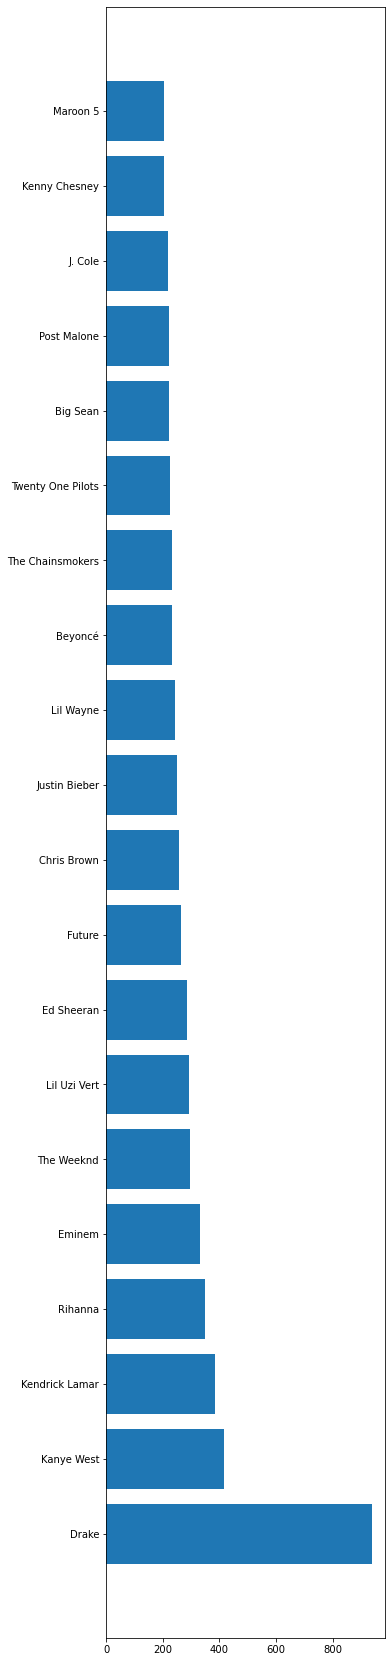

In [117]:
labels =[]
for i in b:
    labels.append(i[0])    
values = []
for j in b:
    values.append(j[1])
    
plt.figure(figsize=(5,30))
plt.barh(labels,values)

In [118]:
result_1 = []
for i in data["playlists"]:
    for j in i["tracks"]:
        result_1.append(j["track_name"])

In [120]:
counter_track = Counter(result_1) 
c = counter_track.most_common()
c

[('Closer', 75),
 ('One Dance', 55),
 ('Ride', 52),
 ('HUMBLE.', 52),
 ('Broccoli (feat. Lil Yachty)', 50),
 ('Roses', 49),
 ('Home', 47),
 ('Congratulations', 47),
 ("Don't Let Me Down", 44),
 ('Forever', 43),
 ('Sorry', 42),
 ('Skinny Love', 41),
 ('iSpy (feat. Lil Yachty)', 39),
 ('Jumpman', 39),
 ('Bounce Back', 39),
 ('Mask Off', 38),
 ('Gold', 38),
 ('Let Me Love You', 38),
 ('Bad and Boujee (feat. Lil Uzi Vert)', 38),
 ('White Iverson', 38),
 ('XO TOUR Llif3', 37),
 ('Panda', 37),
 ('Selfish', 35),
 ('goosebumps', 35),
 ('Down', 35),
 ('Stronger', 35),
 ('Never Be Like You', 35),
 ('Caroline', 35),
 ('Gold Digger', 35),
 ('Yeah!', 34),
 ('Location', 34),
 ('No Role Modelz', 34),
 ('Stay', 33),
 ('T-Shirt', 33),
 ('Work from Home', 33),
 ('Mercy', 33),
 ('Trap Queen', 33),
 ('Waves', 33),
 ('Drive', 32),
 ('Ni**as In Paris', 32),
 ('Cheap Thrills', 32),
 ('Starboy', 32),
 ('Wagon Wheel', 32),
 ('Blessings', 32),
 ('Black Beatles', 32),
 ('Riptide', 31),
 ('September', 31),
 ('Say

In [122]:
d = []
def songApp(num):
    
    for tup in c:
        if tup[1] > num:
            d.append(tup)
    return d    

In [123]:
songApp(25)

[('Closer', 75),
 ('One Dance', 55),
 ('Ride', 52),
 ('HUMBLE.', 52),
 ('Broccoli (feat. Lil Yachty)', 50),
 ('Roses', 49),
 ('Home', 47),
 ('Congratulations', 47),
 ("Don't Let Me Down", 44),
 ('Forever', 43),
 ('Sorry', 42),
 ('Skinny Love', 41),
 ('iSpy (feat. Lil Yachty)', 39),
 ('Jumpman', 39),
 ('Bounce Back', 39),
 ('Mask Off', 38),
 ('Gold', 38),
 ('Let Me Love You', 38),
 ('Bad and Boujee (feat. Lil Uzi Vert)', 38),
 ('White Iverson', 38),
 ('XO TOUR Llif3', 37),
 ('Panda', 37),
 ('Selfish', 35),
 ('goosebumps', 35),
 ('Down', 35),
 ('Stronger', 35),
 ('Never Be Like You', 35),
 ('Caroline', 35),
 ('Gold Digger', 35),
 ('Yeah!', 34),
 ('Location', 34),
 ('No Role Modelz', 34),
 ('Stay', 33),
 ('T-Shirt', 33),
 ('Work from Home', 33),
 ('Mercy', 33),
 ('Trap Queen', 33),
 ('Waves', 33),
 ('Drive', 32),
 ('Ni**as In Paris', 32),
 ('Cheap Thrills', 32),
 ('Starboy', 32),
 ('Wagon Wheel', 32),
 ('Blessings', 32),
 ('Black Beatles', 32),
 ('Riptide', 31),
 ('September', 31),
 ('Say

<BarContainer object of 110 artists>

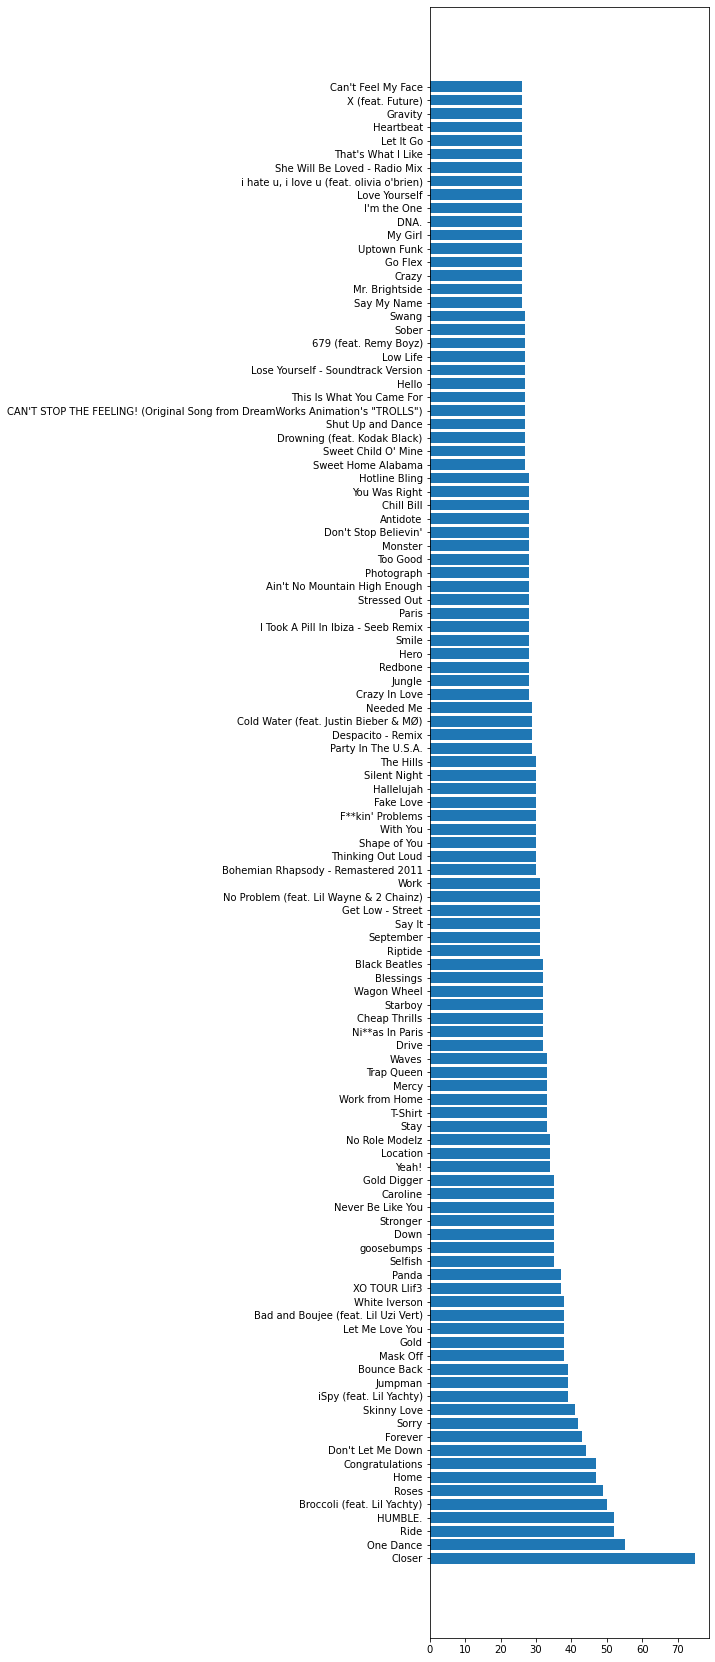

In [124]:
labels =[]
for i in d:
    labels.append(i[0])    
values = []
for j in d:
    values.append(j[1])
    
plt.figure(figsize=(5,30))
plt.barh(labels,values)

## Question 3

For this question we are going to use [Wordbank Data](https://data.worldbank.org/). I would suggest [wbgapi](https://pypi.org/project/wbgapi/) library.

1. Write a function that takes a country name and a list of indicators and returns a pandas data frame with the corresponding data.
2. Get the data for Turkey for the following indicators:
   * [Poverty headcount ratio at national poverty lines (SI.POV.NAHC)](https://data.worldbank.org/indicator/SI.POV.NAHC)
   * [Current health expenditure per capita (SH.XPD.CHEX.PC.CD)](https://data.worldbank.org/indicator/SH.XPD.CHEX.PC.CD)
   * [Labor force participation rate, female (% of female population ages 15+) (SL.TLF.CACT.FE.NE.ZS)](https://data.worldbank.org/indicator/SL.TLF.CACT.FE.NE.ZS)
   * [Mortality rate, under-5 (per 1,000 live births) (SH.DYN.MORT)](https://data.worldbank.org/indicator/SH.DYN.MORT)
   * [Literacy rate, adult female (% of females ages 15 and above) (SE.ADT.LITR.FE.ZS)](https://data.worldbank.org/indicator/SE.ADT.LITR.FE.ZS)
3. Write a function that draws a line plot for a given list of indicators against time (i.e. the x-axis will be the time) AFTER it drops the years where data is not available. Draw a line plot for Turkey for all of the indicators I listed above.
4. Write a function that takes two indicators `id1` and `id2` and does a scatter plot of `id1` against `id2` after it drops the years where data is not available for one of the indicators. Your plot must have labels on the x- and the y-axes to indicate which indicators were used. Then draw a scatter plot (10 in total) for every pair of indicators I listed above.

In [3]:
import wbgapi as wb

In [22]:
def wordBank(country,indicator):
    data = wb.data.DataFrame(f'{indicator}',f'{country}').transpose()
    return pd.DataFrame(data)

In [28]:
def drawLine(country,indicator):
    plot_df = wordBank(country,indicator).dropna()
    return plot_df[f'{country}'].plot(x=f"{country}",kind='line')

In [24]:
wordBank("TUR","SH.DYN.MORT")

economy,TUR
YR1960,257.0
YR1961,249.3
YR1962,241.4
YR1963,233.5
YR1964,225.7
...,...
YR2017,11.4
YR2018,10.7
YR2019,10.1
YR2020,9.5


<AxesSubplot:>

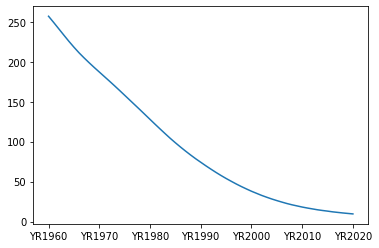

In [31]:
drawLine("TUR","SH.DYN.MORT")

In [12]:
wordBank("TUR","SI.POV.NAHC")

economy,TUR
YR1960,NaN
YR1961,NaN
YR1962,NaN
YR1963,NaN
YR1964,NaN
...,...
YR2017,13.9
YR2018,14.4
YR2019,15.0
YR2020,NaN


<AxesSubplot:>

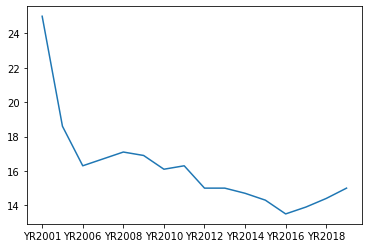

In [32]:
drawLine("TUR","SI.POV.NAHC")

In [7]:
wordBank("TUR","SL.TLF.CACT.FE.NE.ZS")

economy,TUR
YR1960,65.440002
YR1961,NaN
YR1962,NaN
YR1963,NaN
YR1964,NaN
...,...
YR2017,33.529999
YR2018,34.119999
YR2019,34.310001
YR2020,30.840000


<AxesSubplot:>

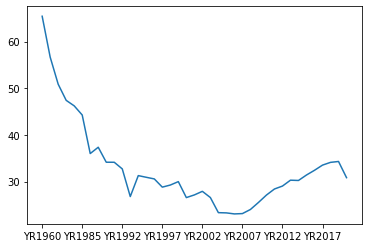

In [30]:
drawLine("TUR","SL.TLF.CACT.FE.NE.ZS")

In [8]:
wordBank("TUR","SH.DYN.MORT")

economy,TUR
YR1960,257.0
YR1961,249.3
YR1962,241.4
YR1963,233.5
YR1964,225.7
...,...
YR2017,11.4
YR2018,10.7
YR2019,10.1
YR2020,9.5


<AxesSubplot:>

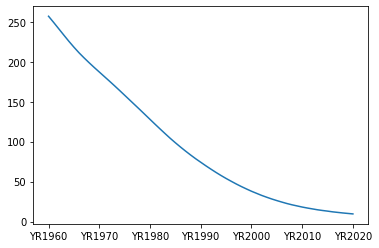

In [29]:
drawLine("TUR","SH.DYN.MORT")

In [9]:
wordBank("TUR","SE.ADT.LITR.FE.ZS")

economy,TUR
YR1960,NaN
YR1961,NaN
YR1962,NaN
YR1963,NaN
YR1964,NaN
...,...
YR2017,93.498268
YR2018,NaN
YR2019,94.424042
YR2020,NaN


<AxesSubplot:>

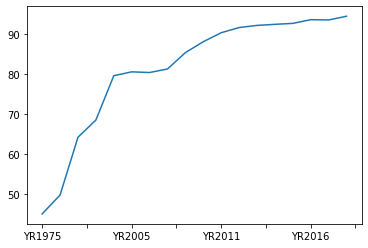

In [34]:
drawLine("TUR","SE.ADT.LITR.FE.ZS")

In [45]:
def drawScatter(id_1,id_2):
    a = wordBank("TUR",f'{id_1}')
    b = wordBank("TUR",f'{id_2}')
    plt.scatter(a["TUR"],b["TUR"],alpha=0.8)
    plt.ylabel(f'{id_1}')
    plt.xlabel(f'{id_2}')
    return plt.show()

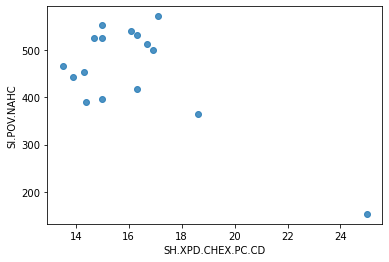

In [46]:
drawScatter("SI.POV.NAHC","SH.XPD.CHEX.PC.CD")

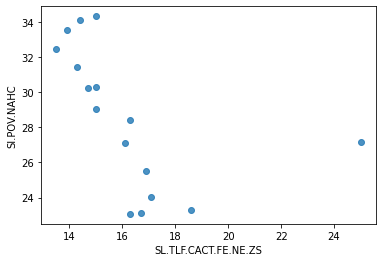

In [47]:
drawScatter("SI.POV.NAHC","SL.TLF.CACT.FE.NE.ZS")

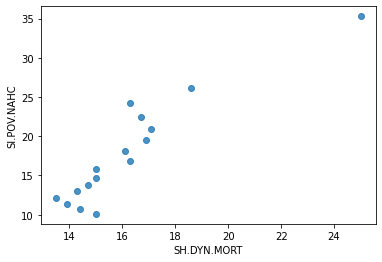

In [48]:
drawScatter("SI.POV.NAHC","SH.DYN.MORT")

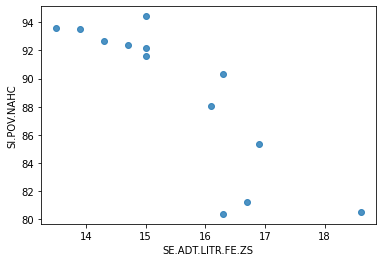

In [49]:
drawScatter("SI.POV.NAHC","SE.ADT.LITR.FE.ZS")

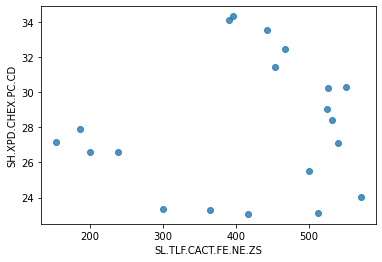

In [50]:
drawScatter("SH.XPD.CHEX.PC.CD","SL.TLF.CACT.FE.NE.ZS")

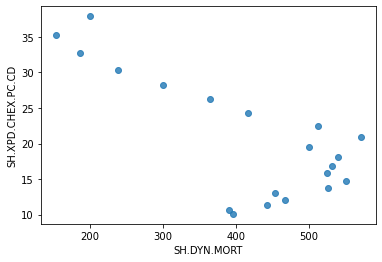

In [51]:
drawScatter("SH.XPD.CHEX.PC.CD","SH.DYN.MORT")

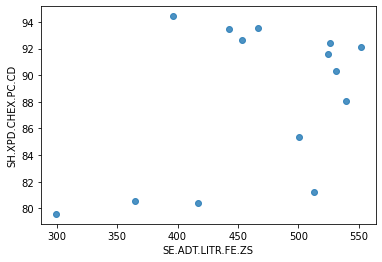

In [52]:
drawScatter("SH.XPD.CHEX.PC.CD","SE.ADT.LITR.FE.ZS")

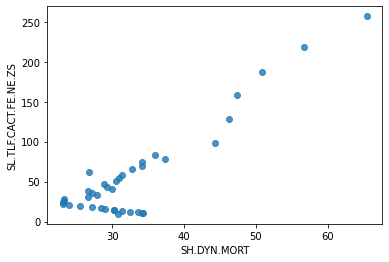

In [53]:
drawScatter("SL.TLF.CACT.FE.NE.ZS","SH.DYN.MORT")

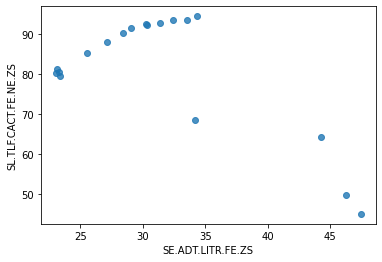

In [54]:
drawScatter("SL.TLF.CACT.FE.NE.ZS","SE.ADT.LITR.FE.ZS")

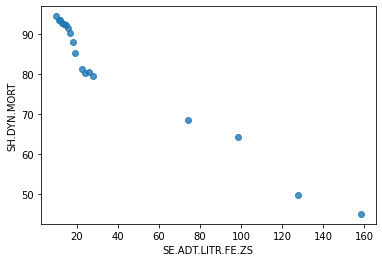

In [55]:
drawScatter("SH.DYN.MORT","SE.ADT.LITR.FE.ZS")